In [3]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from sklearn.datasets import fetch_20newsgroups
data =  fetch_20newsgroups()
data.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
categories = ['alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware',
              'comp.windows.x','misc.forsale','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey','sci.crypt',
              'sci.electronics','sci.med','sci.space','soc.religion.christian','talk.politics.guns','talk.politics.mideast',
              'talk.politics.misc','talk.religion.misc']
#training the data on categories 
train  = fetch_20newsgroups(subset = 'train'  , categories = categories)
#testing the data on categories 
test   = fetch_20newsgroups(subset = "test" , categories = categories)




In [6]:
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [9]:
#importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
from sklearn.pipeline import make_pipeline

In [13]:
#creating model based on multinomial naive bayes
model = make_pipeline(TfidfVectorizer() , MultinomialNB())

In [14]:
#training the model with the train data 
model.fit(train.data , train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [18]:
#creating  labels for the test data
label = model.predict(test.data)

In [19]:
#creating confusion matrix and heat map

Text(110.44999999999996, 0.5, 'False Label')

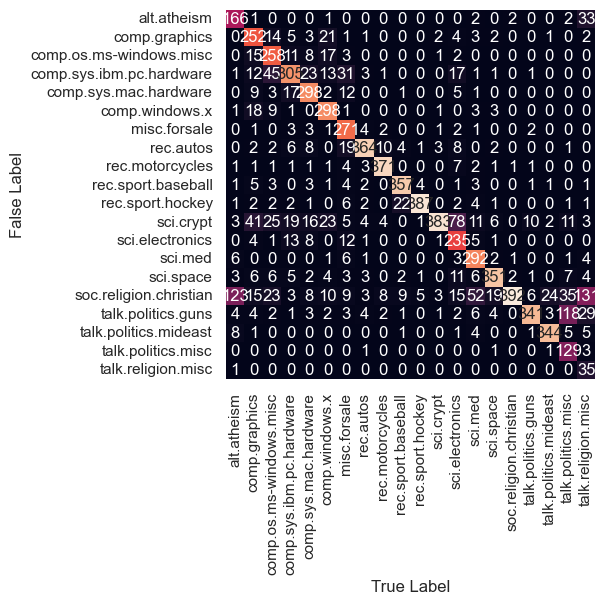

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target , label)
sns.heatmap(mat.T , square = True , annot = True , fmt = 'd' , cbar = False 
            , xticklabels = train.target_names
            , yticklabels = train.target_names)
#plotting heatmap of confusion matrix
plt.xlabel("True Label")
plt.ylabel("False Label")




In [25]:
def predict_category(s, train = train , model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [26]:
predict_category("bhagwad gita")

'soc.religion.christian'

In [29]:
predict_category("Virat kohli ")

'misc.forsale'

In [30]:
predict_category("president of india")

'talk.politics.misc'

In [32]:
predict_category("Sending load to international space station")

'sci.space'

In [33]:
predict_category("BMW is better than AUDi")

'rec.autos'